In [1]:
import pandas as pd
import numpy as np

In [2]:
excel_file = "C:/Users/User/Desktop/SEM 8/FYP II/DATA/DF2.xlsx"

df = pd.read_excel(excel_file)

df.head()

,date,0.2,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
0,2014-01-01,NaN,0.0,15782,1367962,1508980,1935215,NaN,3.2785,110.92,39.04,14.0,26.4,92.5
1,2014-01-02,548.0,27.4,15782,1367962,1508980,1935215,NaN,NaN,NaN,NaN,4.0,25.9,92.1
2,2014-01-03,548.0,27.4,15782,1367962,1508980,1935215,NaN,NaN,NaN,NaN,0.4,26.5,89.6
3,2014-01-04,NaN,0.0,15782,1367962,1508980,1935215,NaN,3.2635,105.62,41.33,0.4,26.7,88.4
4,2014-01-05,NaN,0.0,15782,1367962,1508980,1935215,NaN,3.2625,107.76,41.12,2.0,26.4,87.4


In [3]:
print(df.dtypes)
print(df.isnull().sum())

date                 datetime64[ns]
0.2                         float64
ffb_1%_oer                  float64
import                        int64
export                        int64
production                    int64
end_stock                     int64
cpo_futures                 float64
usd_myr_rate                float64
brent_oil_futures           float64
soybean_futures             float64
precipitation               float64
avg_temperature             float64
avg_humidity                float64
dtype: object
date                    0
0.2                   788
ffb_1%_oer            753
import                  0
export                  0
production              0
end_stock               0
cpo_futures          1544
usd_myr_rate         1234
brent_oil_futures    1222
soybean_futures      1244
precipitation           0
avg_temperature        62
avg_humidity           62
dtype: int64


In [4]:
df.shape

(4169, 14)

In [5]:
df['ffb_1%_oer'] = df['ffb_1%_oer'].replace(0, np.nan)
df.isnull().sum()

date                    0
0.2                   788
ffb_1%_oer           1367
import                  0
export                  0
production              0
end_stock               0
cpo_futures          1544
usd_myr_rate         1234
brent_oil_futures    1222
soybean_futures      1244
precipitation           0
avg_temperature        62
avg_humidity           62
dtype: int64

In [6]:
columns_to_check = ['ffb_1%_oer','cpo_futures','usd_myr_rate','brent_oil_futures','soybean_futures']

df1 = df.dropna(subset=columns_to_check)

In [7]:
df1.isnull().sum()

date                  0
0.2                   0
ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature      41
avg_humidity         41
dtype: int64

In [8]:
df1 = df1.drop(columns=[0.2])

In [9]:
df1['ffb_1%_oer'] = pd.to_numeric(df1['ffb_1%_oer'], errors='coerce')

In [10]:
df1.set_index("date", inplace=True)

In [11]:
df1.head()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
date,,,,,,,,,,,,
2014-01-10,26.65,15782,1367962,1508980,1935215,2210.0,3.2725,94.16,33.08,53.4,25.4,88.6
2014-02-10,27.45,8259,1351441,1275812,1656931,2165.0,3.2515,93.42,33.06,1.2,26.9,88.0
2014-02-12,27.70,8259,1351441,1275812,1656931,2129.0,3.4225,70.54,31.53,12.0,26.2,85.4
2014-03-10,31.45,15140,1245766,1497142,1688093,2187.0,3.2575,92.31,32.68,0.0,25.9,85.9
2014-03-11,31.75,15140,1245766,1497142,1688093,2315.0,3.3175,84.78,34.47,0.0,26.0,84.4


In [12]:
df1.shape

(2434, 12)

In [13]:
#time interpolation
df1["avg_temperature"] = df1["avg_temperature"].interpolate(method="time", limit=7, limit_direction="both")
df1["avg_humidity"] = df1["avg_humidity"].interpolate(method="time", limit=7, limit_direction="both")

df1.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature      13
avg_humidity         13
dtype: int64

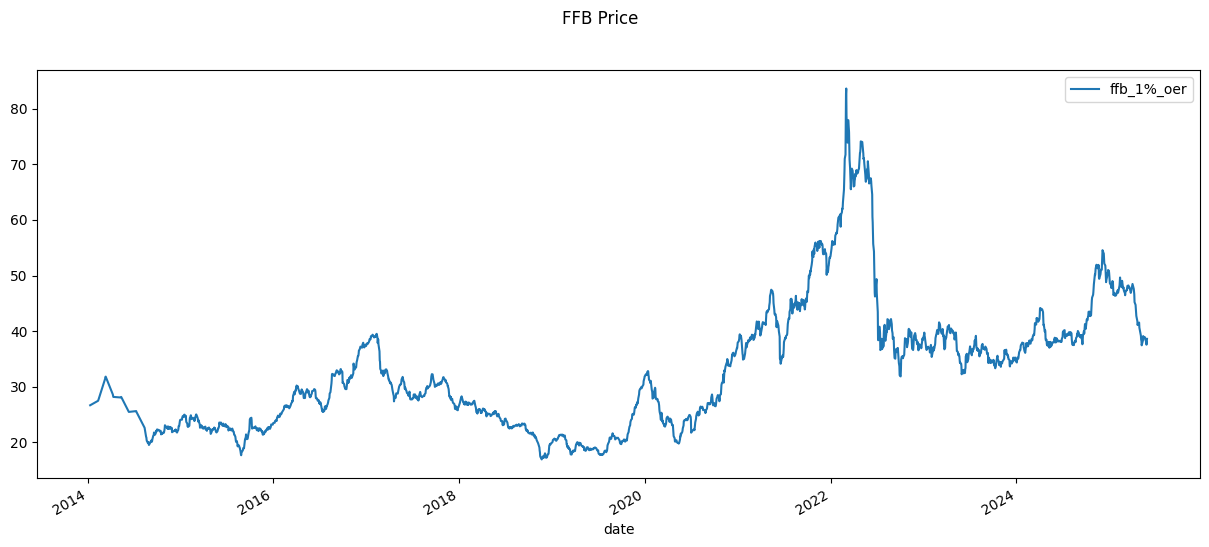

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df1[["ffb_1%_oer"]].plot(figsize=(15,6), subplots=True, title="FFB Price")
plt.show()

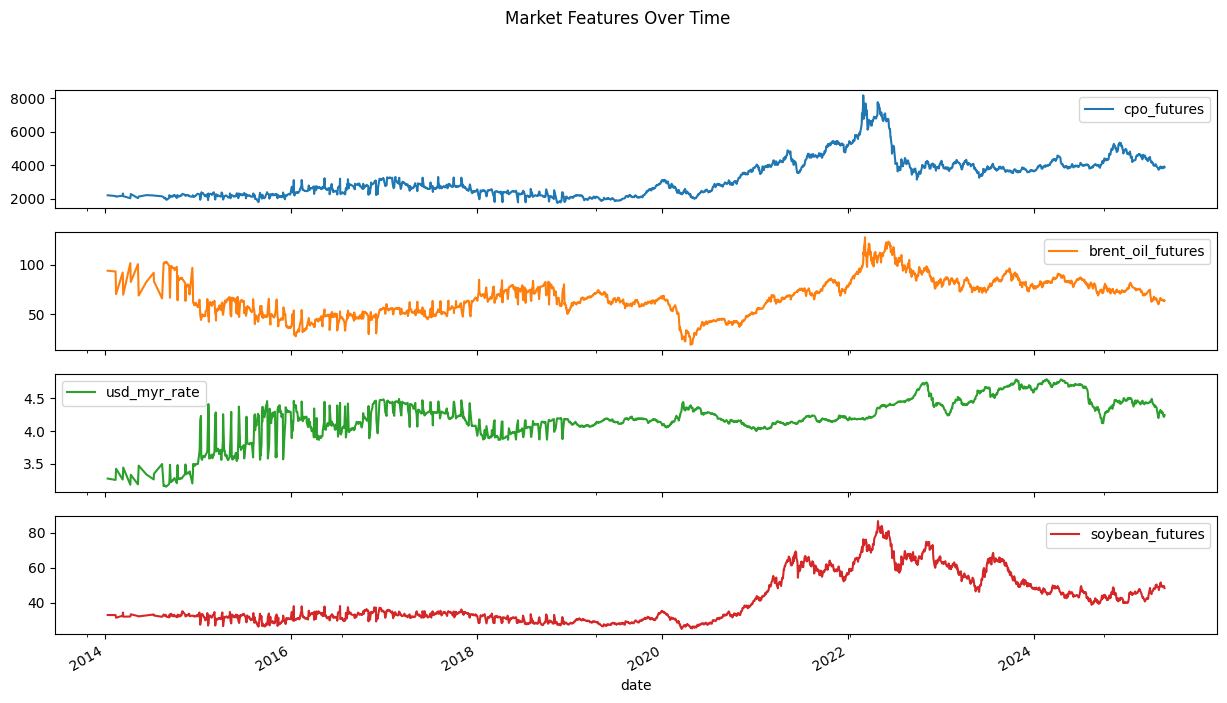

In [21]:
df1[["cpo_futures","brent_oil_futures","usd_myr_rate","soybean_futures"]].plot(figsize=(15,8), subplots=True, title="Market Features Over Time")
plt.show()

In [15]:
print(df1['ffb_1%_oer'].describe())

count    2434.000000
mean       33.139663
std        11.555844
min        16.900000
25%        23.650000
50%        31.400000
75%        38.970000
max        83.650000
Name: ffb_1%_oer, dtype: float64


In [17]:
df1.to_excel('cleaned_data3.xlsx', index=False)

In [18]:
df1.dtypes

ffb_1%_oer           float64
import                 int64
export                 int64
production             int64
end_stock              int64
cpo_futures          float64
usd_myr_rate         float64
brent_oil_futures    float64
soybean_futures      float64
precipitation        float64
avg_temperature      float64
avg_humidity         float64
dtype: object

In [20]:
df1.describe()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
count,2434.000000,2434.000000,2.434000e+03,2.434000e+03,2.434000e+03,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2421.000000,2421.000000
mean,33.139663,70796.817584,1.383043e+06,1.592362e+06,1.990284e+06,3280.659408,4.220633,67.667482,41.868468,9.805300,27.112076,87.494139
std,11.555844,40405.682107,2.018293e+05,2.278809e+05,4.226423e+05,1151.293467,0.302763,18.416249,14.008787,14.343439,0.996361,3.564815
min,16.900000,1792.000000,9.005580e+05,1.042707e+06,1.264881e+06,1759.000000,3.148000,19.330000,25.340000,0.000000,23.700000,74.958333
25%,23.650000,41798.000000,1.213539e+06,1.447697e+06,1.666673e+06,2294.000000,4.103000,53.717500,31.140000,0.400000,26.431373,85.000000
50%,31.400000,65112.000000,1.385079e+06,1.609927e+06,1.883465e+06,2892.000000,4.195000,67.060000,34.350000,4.200000,27.125000,87.500000
75%,38.970000,90353.000000,1.521329e+06,1.779918e+06,2.280561e+06,3987.000000,4.420000,79.767500,51.667500,13.775000,27.800000,90.000000
max,83.650000,282058.000000,1.824437e+06,2.051000e+06,3.216476e+06,8163.000000,4.795000,127.980000,86.600000,151.000000,29.812500,98.500000


Feature Engineering:

In [22]:
#lag features
for lag in [1, 3, 7]:
    df1[f"lag_{lag}"] = df1["ffb_1%_oer"].shift(lag)


#rolling means
df1["rolling_mean_7"] = df1["ffb_1%_oer"].rolling(window=7).mean()
df1["rolling_mean_30"] = df1["ffb_1%_oer"].rolling(window=30).mean()

#rolling std
df1["rolling_std_7"] = df1["ffb_1%_oer"].rolling(window=7).std()
df1["rolling_std_30"] = df1["ffb_1%_oer"].rolling(window=30).std()

#pct change
df1["pct_change_1"] = df1["ffb_1%_oer"].pct_change(periods=1)
df1["pct_change_7"] = df1["ffb_1%_oer"].pct_change(periods=7)

In [23]:
df1.head()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,...,avg_humidity,lag_1,lag_3,lag_7,rolling_mean_7,rolling_mean_30,rolling_std_7,rolling_std_30,pct_change_1,pct_change_7
date,,,,,,,,,,,,,,,,,,,,,
2014-01-10,26.65,15782,1367962,1508980,1935215,2210.0,3.2725,94.16,33.08,53.4,...,88.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-10,27.45,8259,1351441,1275812,1656931,2165.0,3.2515,93.42,33.06,1.2,...,88.0,26.65,NaN,NaN,NaN,NaN,NaN,NaN,0.030019,NaN
2014-02-12,27.70,8259,1351441,1275812,1656931,2129.0,3.4225,70.54,31.53,12.0,...,85.4,27.45,NaN,NaN,NaN,NaN,NaN,NaN,0.009107,NaN
2014-03-10,31.45,15140,1245766,1497142,1688093,2187.0,3.2575,92.31,32.68,0.0,...,85.9,27.70,26.65,NaN,NaN,NaN,NaN,NaN,0.135379,NaN
2014-03-11,31.75,15140,1245766,1497142,1688093,2315.0,3.3175,84.78,34.47,0.0,...,84.4,31.45,27.45,NaN,NaN,NaN,NaN,NaN,0.009539,NaN


In [24]:
df1.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature      13
avg_humidity         13
lag_1                 1
lag_3                 3
lag_7                 7
rolling_mean_7        6
rolling_mean_30      29
rolling_std_7         6
rolling_std_30       29
pct_change_1          1
pct_change_7          7
dtype: int64

In [25]:
df1.dropna(inplace=True)

In [26]:
df1.isnull().sum()

ffb_1%_oer           0
import               0
export               0
production           0
end_stock            0
cpo_futures          0
usd_myr_rate         0
brent_oil_futures    0
soybean_futures      0
precipitation        0
avg_temperature      0
avg_humidity         0
lag_1                0
lag_3                0
lag_7                0
rolling_mean_7       0
rolling_mean_30      0
rolling_std_7        0
rolling_std_30       0
pct_change_1         0
pct_change_7         0
dtype: int64

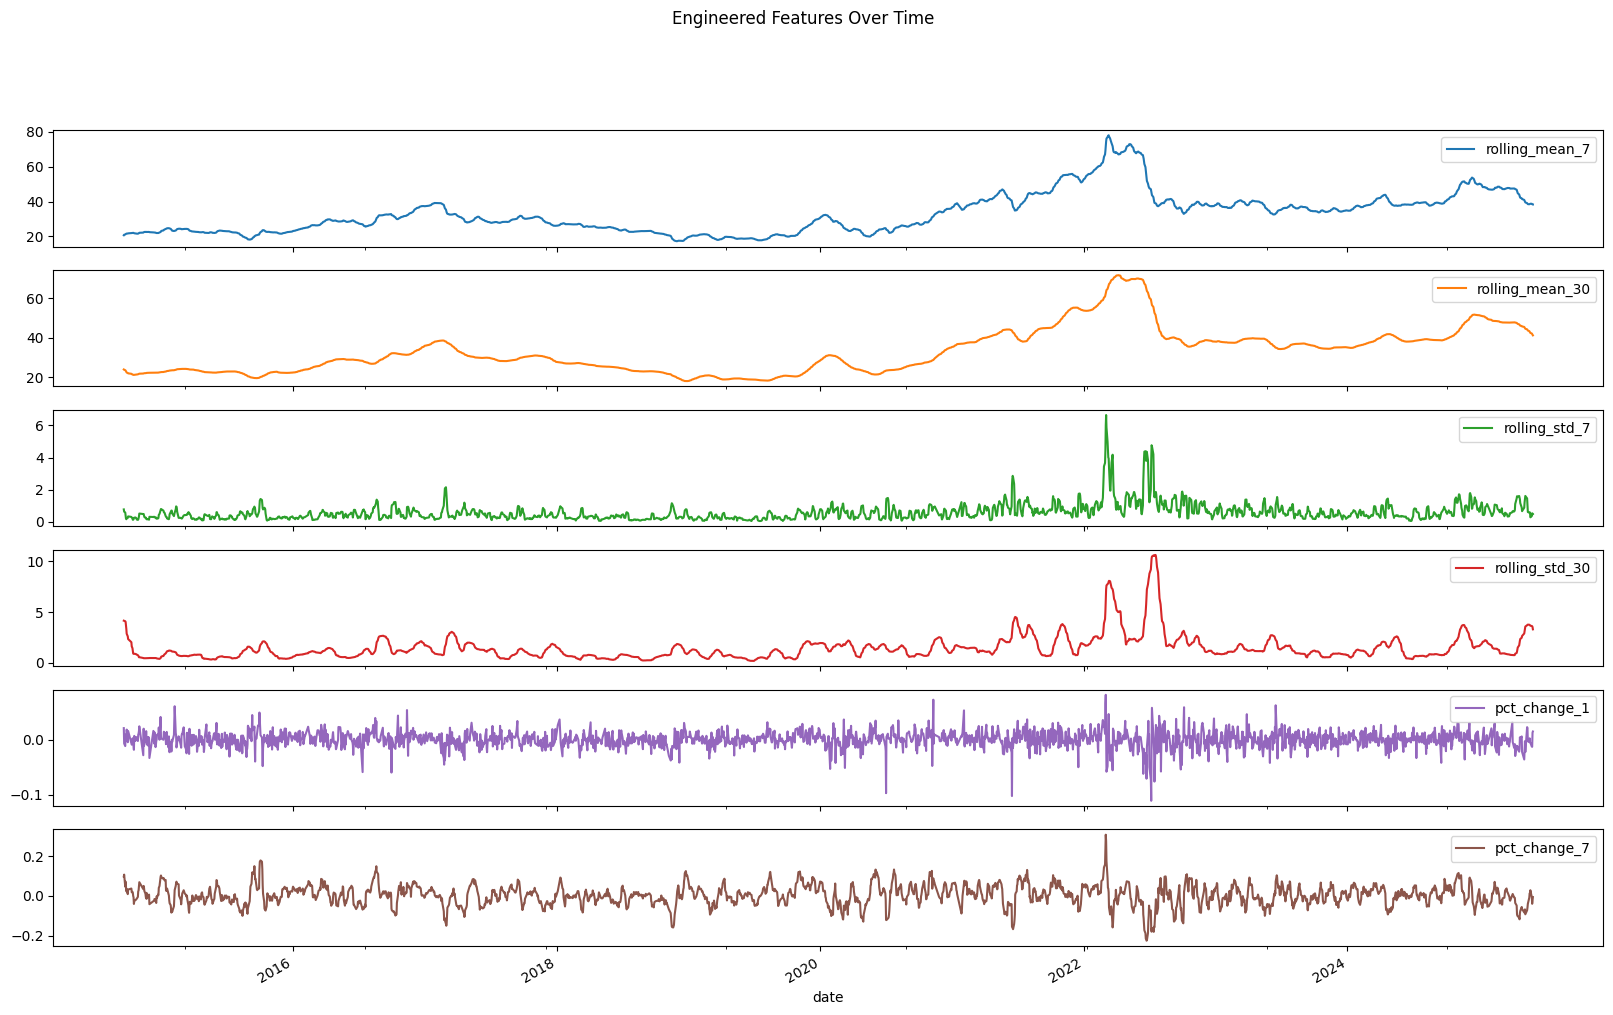

In [27]:
df1[["rolling_mean_7","rolling_mean_30","rolling_std_7","rolling_std_30","pct_change_1","pct_change_7"]].plot(figsize=(20,12), subplots=True, title="Engineered Features Over Time")
plt.show()

In [28]:
df1.to_parquet("cleaned_data3.parquet", index=False)
